In [14]:
import pandas as pd
import numpy as np



In [2]:
caminho_base_marketing = (r'C:\Users\gmach\OneDrive\Documentos\07 - Estudos\Universidade de Dados\Bases\marketing_campaign.csv')

df_marketing = pd.read_csv(caminho_base_marketing, sep='\t')

df_marketing.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print(df_marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
print(df_marketing.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [5]:
print(df_marketing.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [6]:
df_marketing.dropna(inplace=True)

In [7]:
df_marketing['Age'] = 2024 - df_marketing['Year_Birth']

#### ROI por cliente

In [8]:
df_marketing['Total_Spending'] = df_marketing[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df_marketing['ROI'] = (df_marketing['Total_Spending'] / df_marketing['Income']) * 100

#### Engajamento por canal de vendas:

In [9]:
df_marketing['Channel_Engagement'] = df_marketing[['NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

#### Resposta à campanha:

In [10]:
responde_rate = df_marketing['Response'].mean() * 100
print(f'Taxa de resposta à campanha: {responde_rate:.2f}%')

Taxa de resposta à campanha: 15.03%


### Análises Focadas

#### Qual o perfil de cliente gera mais retorno? Analisar o ROI por idade, educação, estado civil

In [11]:
df_marketing.groupby('Marital_Status')['ROI'].mean()

Marital_Status
Absurd      1.659794
Alone       0.475844
Divorced    0.961261
Married     1.015464
Single      0.982120
Together    0.954155
Widow       1.149527
YOLO        0.875454
Name: ROI, dtype: float64

In [12]:
df_marketing.groupby('Age')['ROI'].mean()

Age
28     0.868808
29     0.980126
30     1.682367
31     1.609933
32     1.121656
33     1.648852
34     0.912279
35     0.687981
36     1.098885
37     1.018754
38     0.807524
39     0.676432
40     0.718644
41     0.740036
42     1.265672
43     0.810558
44     0.817931
45     2.099884
46     0.742845
47     0.815415
48     0.850906
49     0.927848
50     0.759798
51     0.682399
52     0.894367
53     0.851490
54     1.040361
55     1.136898
56     0.794192
57     0.916329
58     0.992502
59     0.940195
60     1.130060
61     0.987942
62     1.151647
63     1.142849
64     0.908120
65     1.034962
66     1.120178
67     1.049538
68     1.057959
69     1.087043
70     1.213033
71     1.098491
72     0.970876
73     1.055367
74     0.715635
75     1.327205
76     1.175303
77     1.409174
78     1.178984
79     1.493406
80     1.471483
81     1.797445
83     2.277833
84     0.306994
124    0.177402
125    2.218312
131    0.036556
Name: ROI, dtype: float64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df_marketing["Age"] = 2024 - df_marketing["Year_Birth"]
age_bins = pd.cut(df_marketing["Age"], bins=[18, 30, 40, 50, 60, 100], labels=["18-30", "30-40", "40-50", "50-60", "60+"])
sns.boxplot(data=df_marketing, x=age_bins, y="ROI")
plt.ylim(0, 10)5
plt.title("Distribuição do ROI por Faixa Etária")
plt.show()

SyntaxError: invalid syntax (3294916403.py, line 7)

C:\Users\gmach\AppData\Local\Temp\ipykernel_7460\737135045.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_marketing, x="Marital_Status", y="Response", ci=None)


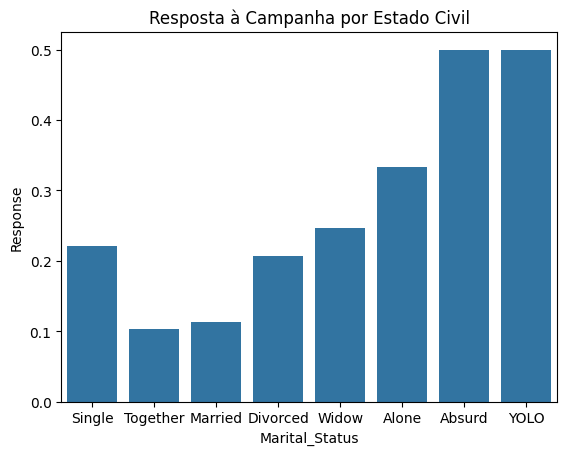

In [ ]:
sns.barplot(data=df_marketing, x="Marital_Status", y="Response", ci=None)
plt.title("Resposta à Campanha por Estado Civil")
plt.show()


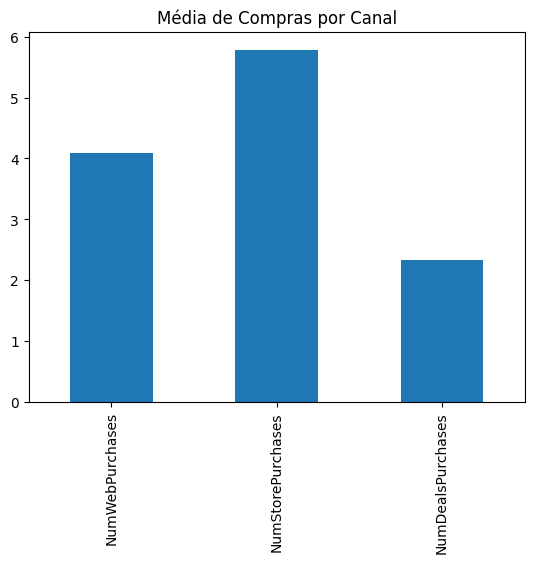

In [ ]:
channel_means = df_marketing[["NumWebPurchases", "NumStorePurchases", "NumDealsPurchases"]].mean()
channel_means.plot(kind="bar", title="Média de Compras por Canal")
plt.show()
